### Importing required Libraries.

In [7]:
## Library for data analysis.
import pandas as pd 
## Library for Mathemetical operation.
import numpy as np
## Import matplot library.
import matplotlib.pyplot as plt

### Importing data to Pandas..

In [8]:
# df = pd.read_csv("Insurance.csv")
df = pd.read_csv("train.csv")

### Knowing your data.

In [9]:
### Getting to know the dataTypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
### Size of your data.
df.shape
print("Total column in the data:",df.shape[1] )
print("Total Observation in the data:",df.shape[0] )

Total column in the data: 12
Total Observation in the data: 891


In [11]:
### find column in your data.
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
### Print top 5 rows.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
### Print bottom 5 rows.
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [14]:
### Print bottom 5 rows.
df.describe().T
# df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [15]:
df.describe(include=['O']).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


### Missing value treatment.

In [16]:
### Find missing values in for each Variable.
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [17]:
df.PassengerId.count()

891

In [18]:
missing = (df.isnull().sum().sort_values(ascending=False)/df.PassengerId.count())*100
pd.DataFrame(missing)

,0
Cabin,77.104377
Age,19.865320
Embarked,0.224467
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000


#### General Rules for missing value treatment.
##### 1. If Missing value is greater then 70% drop thant column.
##### 2. Replace missing value by Mean or Median for continious variables.
##### 3. Replace missing value by Mode for categorical variables.


In [19]:
#### Drop the Cabin variable.
# df.drop(['Cabin'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
#### Replace age with mean value.
# Mean = df.Age.mean()
df.fillna(df.Age.mean(),inplace=True)

In [22]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### Basic EDA on Survival.

In [23]:
####Survival by Passenger class.
df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).sum()

,Pclass,Survived
0,1,136
1,2,87
2,3,119


In [24]:
####Survival by Gender class.
df_bar = df[['Sex','Survived']].groupby(['Sex'],as_index=False).sum()
df_bar

,Sex,Survived
0,female,233
1,male,109


In [25]:
df_bar = df[['Sex','Survived']].groupby(['Sex']).sum()
df_bar

,Survived
Sex,
female,233
male,109


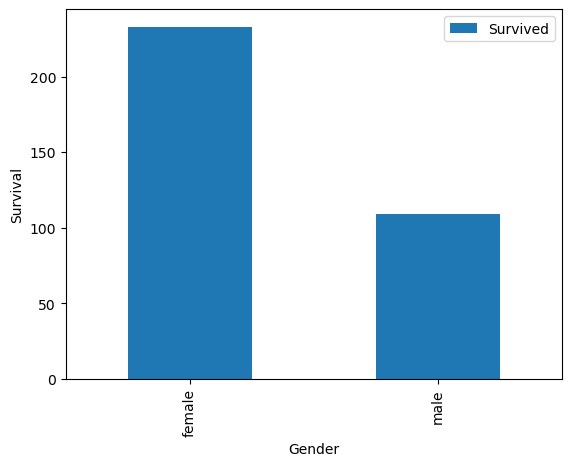

In [26]:
df_bar.plot.bar()
plt.xlabel("Gender")
plt.ylabel("Survival")
plt.show()

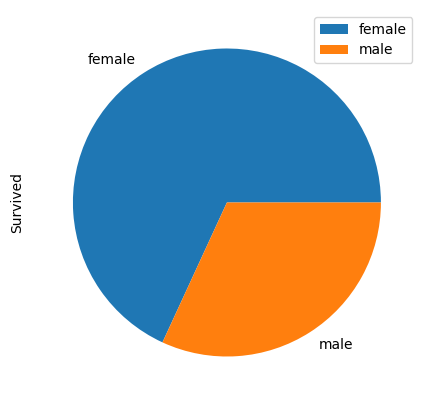

In [27]:
df_bar.plot.pie(y='Survived', figsize=(5, 5))
# plt.xlabel("Gender")
# plt.ylabel("Survival")
plt.show()

### Segregated Categorical & Numerical variables.

In [28]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [29]:
### All columns.
all_cols = df.columns.tolist()
all_cols

### categorical columns.
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols

### numerical columns.
num_cols = df.select_dtypes(exclude='object').columns.tolist()
num_cols

print("Numerical Columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [30]:
df_numerical_cols = df_numerical.columns.tolist()
df_categorical_cols = df_categorical.columns.tolist()

NameError: name 'df_numerical' is not defined

In [31]:
cat_col = df.dtypes[df.dtypes == 'O'].index.to_list()
num_col = df.dtypes[~(df.dtypes == 'O')].index.tolist()

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,29.699118,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,29.699118,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,29.699118,S


### Outlier Treatment.
What is Outlier - Any extremere value in the observations/random sample are called outlier.
Why You need to remove outlier - It can imact the whole population or the predectin power.

In [33]:
Salry = [10,23,14,18,12,65]
np.mean(Salry)

23.666666666666668

#### 1. Using the Boxplot..

In [35]:
perc = [.20, .40, .60, .80,.90,.98]
df['Fare'].describe(percentiles=perc)

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
20%        7.854200
40%       10.500000
50%       14.454200
60%       21.679200
80%       39.687500
90%       77.958300
98%      211.337500
max      512.329200
Name: Fare, dtype: float64

In [36]:
df[df['Fare']>211].PassengerId.count()

20

In [37]:
q_low = df['Fare'].quantile(0.01)
q_hi  = df['Fare'].quantile(0.99)
df_filtered = df[(df['Fare'] < q_hi) & (df['Fare'] > q_low)]

In [38]:
df_clipped = df.Fare.clip(lower=q_low,upper=q_hi)
df_clipped
# cols = ['value', 'another col']
# dfo[cols] = dfo[cols].clip(upper=100)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

### Using Z-Score

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,29.699118,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,29.699118,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,29.699118,S


In [44]:
df.Fare.quantile([.1,.5,.9,.95,.99])

0.10      7.55000
0.50     14.45420
0.90     77.95830
0.95    112.07915
0.99    249.00622
Name: Fare, dtype: float64

In [47]:
df.Fare.describe(percentiles=[.1,.5,.9,.95,.99]).T

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
10%        7.550000
50%       14.454200
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: Fare, dtype: float64

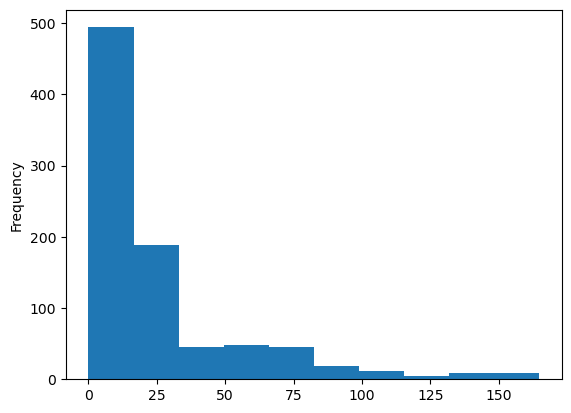

In [69]:
df.Fare.plot(kind='hist', bins=10)
plt.show()

In [ ]:
df.Fare.plot(kind='hist')
plt.show()

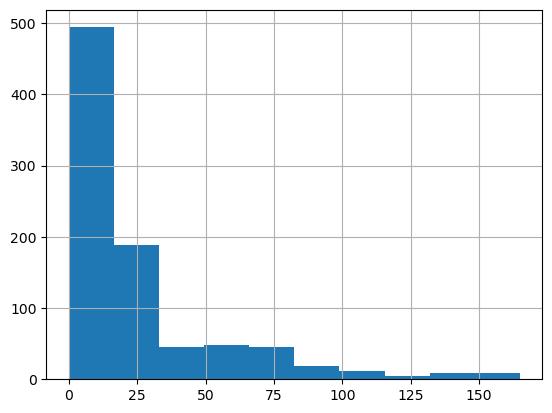

In [68]:
df.Fare.hist(bins=10)
plt.show()

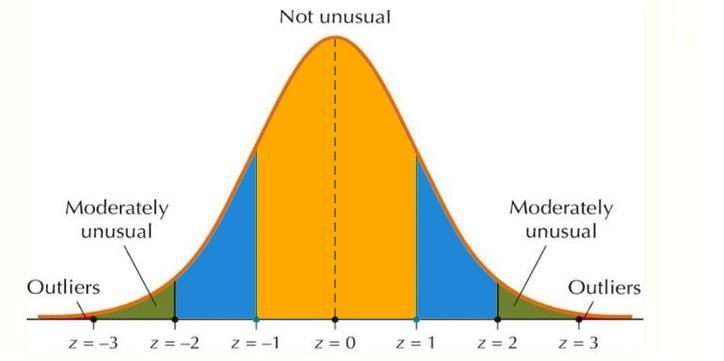

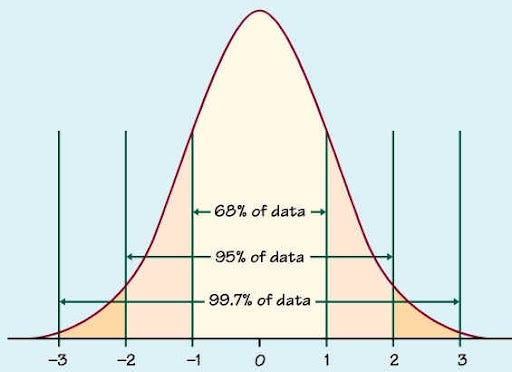

In [54]:
Mean = df.Fare.mean()
Std_dev = df.Fare.std()

UL = Mean + 3*Std_dev
LL = Mean - 3*Std_dev

print("Lower Limit:", LL, "Upper Limit:" ,UL)
print(Mean, Std_dev)

Lower Limit: -116.87607782296811 Upper Limit: 181.2844937601173
32.2042079685746 49.693428597180905


In [55]:
df = df[(df.Fare < UL) & (df.Fare > LL)]

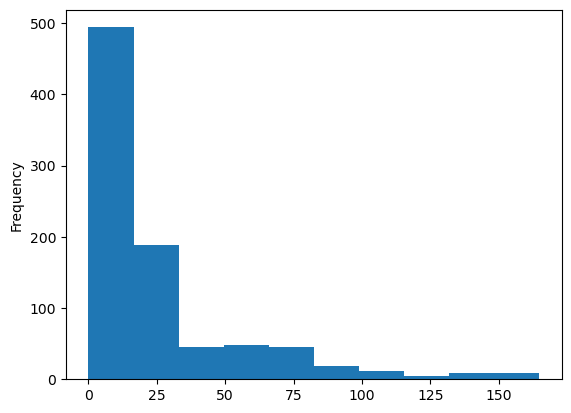

In [56]:
df.Fare.plot(kind='hist')
plt.show()

### Using IQR Method.

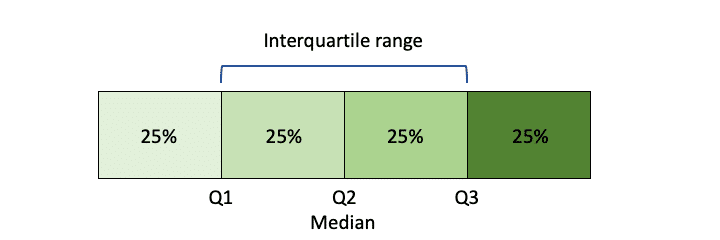

In [64]:
Q1 = df.Fare.quantile(.25)
Q3 = df.Fare.quantile(.75)
IQR = Q3-Q1

LB = Q1-1.5*IQR
UB = Q1+1.5*IQR

print("Q1:",Q1,",Q3:",Q3, ",IQR:",IQR)
print("LB:",LB,",UB:",UB)

Q1: 7.8958 ,Q3: 30.0 ,IQR: 22.1042
LB: -25.2605 ,UB: 41.0521


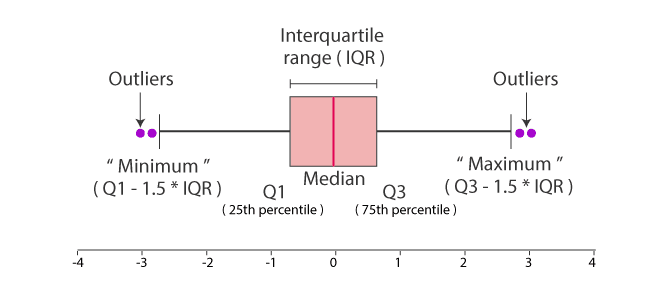

### Using Z-Score

### Lable Encoding & One Hot Encoding.

### Data Type in Python.

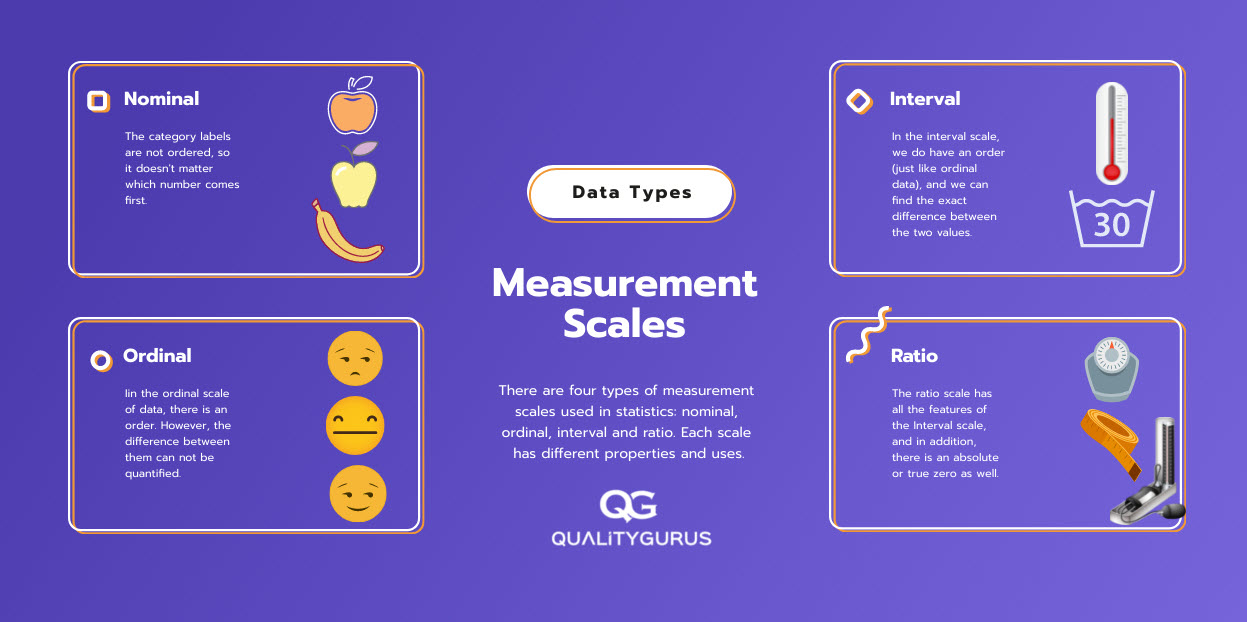

### Employee Data.

##### Age, Department, Designation & predict Salary..

>#### Age - numerical data.

>#### Designation - Categorical - Ordinal.

>#### Department - Categorical -Nominal.

> Salary = C1 + C2*Age + C3*Designation + C4*Department1 + C5*Department2 + C6*Department3

#### 1. Label Encoding - Ordinal Data
#### 2. One Hot Encoding - Nominal Data

In [72]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,29.699118,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,29.699118,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,29.699118,S


In [74]:
df.Pclass.value_counts()

3    491
1    196
2    184
Name: Pclass, dtype: int64

In [76]:
# import lable encoder.
from sklearn import preprocessing

#Create the object.
label_encoder = preprocessing.LabelEncoder()

# Encode labels for P-Class.
df['Pclass'] = label_encoder.fit_transform(df['Pclass'])

In [77]:
df['Pclass'].value_counts()

2    491
0    196
1    184
Name: Pclass, dtype: int64

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['species']= label_encoder.fit_transform(df['species'])
  
df['species'].unique()

### One Hot encoding.

In [84]:
### It can be done using pandas.
df_one_hot_encoded = pd.get_dummies(df, columns = ['Sex'])
df_one_hot_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,2,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,29.699118,S,0,1
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,2,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,29.699118,S,1,0
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,2,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,29.699118,S,0,1


### | Standarization in Pandas.

> #### Normalization : Rescales the values into a range of [0,1].
> #### Standardization : Rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).

### StandardScaler (usually called Z-score Standardization) or MinMaxScaler (usually called min-max Normalization) 

Referance :
https://www.geeksforgeeks.org/normalization-vs-standardization/

## Normalization :
####    X_new = (X - X_min)/(X_max - X_min)

In [103]:
from sklearn.preprocessing import MinMaxScaler
Scale =  MinMaxScaler()
df['Fare_Min_Max_Scaled'] = Scale.fit_transform(df[['Fare']])
# df.head()

In [104]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Scaled
0,1,0,2,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,29.699118,S,0.043975
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.432369
2,3,1,2,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,29.699118,S,0.048069
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.322078
4,5,0,2,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,29.699118,S,0.048827


### Z-Score Standarization
#### X_std = (X - mean)/Std

In [105]:
from sklearn.preprocessing import StandardScaler
Scale =  StandardScaler()
df['Fare_Standard_Scaled'] = Scale.fit_transform(df[['Fare']])
# df.head()

In [106]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Scaled,Fare_Standard_Scaled
0,1,0,2,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,29.699118,S,0.043975,-0.657256
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.432369,1.525623
2,3,1,2,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,29.699118,S,0.048069,-0.634246
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.322078,0.905759
4,5,0,2,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,29.699118,S,0.048827,-0.629984


Reference :
https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

Refernece :
https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

In [ ]:
https://www.geeksforgeeks.org/normalization-vs-standardization/